# Deep Learning - Hidden Layers

https://www.youtube.com/watch?v=UCG1FuKmIOs

## Why do we stack layers 
(adapted from http://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute)

Let's call the input vector $x$, the hidden layer activations $h$, and the output activation $y$.  You have some function $f$ that maps from $x$ to $h$ and another function $g$ that maps from $h$ to $y$.  

So the hidden layer's activation is $f(x)$ and the output of the network is $g(f(x))$.

**Why have two functions ($f$ and $g$) instead of just one?**

If the level of complexity per function is limited, then $g(f(x))$ can compute things that $f$ and $g$ can't do individually.  

------

**An example with logical functions:**

For example, if we only allow $f$ and $g$ to be simple logical operators like "AND", "OR", and "NAND", then you can't compute other functions like "XOR" with just one of them.  On the other hand, we *could* compute "XOR" if we were willing to layer these functions on top of each other: 

First layer functions:

* Make sure that at least one element is "TRUE" (using OR)
* Make sure that they're not all "TRUE" (using NAND)

Second layer function:

* Make sure that both of the first-layer criteria are satisfied (using AND)

The network's output is just the result of this second function.  The first layer *transforms the inputs* into something that the second layer can use so that the whole network can perform XOR.

----

**An example with images:**

Slide 61 from [this talk](http://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/CVPR2012-Tutorial_lee.pdf) as a single image--shows (one way to visualize) what the different hidden layers in a particular neural network are looking for.

![cnn](nn.png)

The first layer looks for short pieces of edges in the image: these are very easy to find from raw pixel data, but they're not very useful by themselves for telling you if you're looking at a face or a bus or an elephant.

The next layer composes the edges: if the edges from the bottom hidden layer fit together in a certain way, then one of the eye-detectors in the middle of left-most column might turn on.  It would be hard to make a single layer that was so good at finding something so specific from the raw pixels: eye detectors are much easier to build out of edge detectors than out of raw pixels.

The next layer up composes the eye detectors and the nose detectors into faces.  In other words, these will light up when the eye detectors and nose detectors from the previous layer turn on with the right patterns.  These are very good at looking for particular kinds of faces: if one or more of them lights up, then your output layer should report that a face is present.

This is useful because **face detectors are easy to build out of eye detectors and nose detectors, but really hard to build out of pixel intensities.**

So each layer gets you farther and farther from the raw pixels and closer to your ultimate goal (e.g. face detection or bus detection).

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UCG1FuKmIOs")

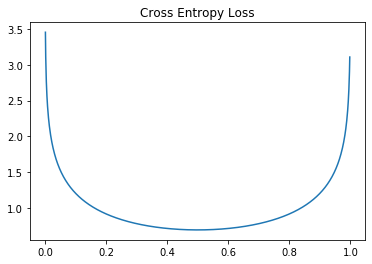

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

y = 0.5
def loss(p,y):
    l = -(y*np.log(p)+(1-y)*np.log(1-p))
    return l

p = np.arange(1e-3,0.999,1e-3)

l = loss(p,y)
plt.plot(p,l)
plt.title('Cross Entropy Loss')
plt.show()

## Useful terms:

1. Activation
2. Softmax
3. Cross Entropy
4. One Hot Encoding
5. Gradient Descent

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('./', one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

In [18]:
x, y = mnist.train.next_batch(20)

In [19]:
x.shape

(20, 784)

In [20]:
28*28

784

In [21]:
y.shape

(20, 10)

In [6]:
y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

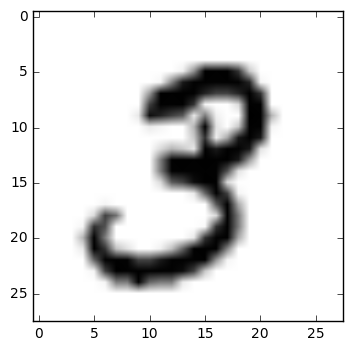

In [23]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

In [24]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b

y_true = tf.placeholder(tf.float32,[None, 10])

#   tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0:
        print('loss: '+str(l))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: 2.30258
loss: 0.389749
loss: 0.485583
loss: 0.222426
loss: 0.302407
loss: 0.286258
loss: 0.24921
loss: 0.282081
loss: 0.29155
loss: 0.299976


Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [ ]:
[-2, 1]
exp(-2)/(exp(-2)+exp(1))

In [26]:
# test the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9214


In [10]:
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_true: mnist.train.labels}))

0.916564


In [38]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.30258 accuracy: 0.0859375
10: loss: 0.924381 accuracy: 0.742188
20: loss: 0.679864 accuracy: 0.84375
30: loss: 0.598077 accuracy: 0.789062
40: loss: 0.398598 accuracy: 0.9375
50: loss: 0.473592 accuracy: 0.828125
60: loss: 0.571691 accuracy: 0.8125
70: loss: 0.475025 accuracy: 0.875
80: loss: 0.380094 accuracy: 0.929688
90: loss: 0.232757 accuracy: 0.96875
100: loss: 0.496833 accuracy: 0.851562
200: loss: 0.412172 accuracy: 0.867188
300: loss: 0.260597 accuracy: 0.9375
400: loss: 0.247081 accuracy: 0.929688
500: loss: 0.294148 accuracy: 0.929688
600: loss: 0.251191 accuracy: 0.914062
700: loss: 0.172335 accuracy: 0.945312
800: loss: 0.333997 accuracy: 0.914062
900: loss: 0.207521 accuracy: 0.953125


## Hidden Layered Network

In [11]:
def fully_conntected_activation(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.nn.relu(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.matmul(input,W)+b
    
    return activation

In [27]:
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32,[None, 10])

hidden = fully_conntected_activation(x,784,100)
output = fully_conntected(hidden,100,10)
# output = fully_conntected(x,784,10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# test the model
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                     feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0: loss: 2.42528 accuracy: 0.0703125
10: loss: 0.983693 accuracy: 0.71875
20: loss: 1.03271 accuracy: 0.648438
30: loss: 0.517626 accuracy: 0.835938
40: loss: 0.44244 accuracy: 0.890625
50: loss: 0.337583 accuracy: 0.90625
60: loss: 0.440305 accuracy: 0.851562
70: loss: 0.521924 accuracy: 0.8125
80: loss: 0.536625 accuracy: 0.8125
90: loss: 0.159889 accuracy: 0.960938
100: loss: 0.384946 accuracy: 0.875
200: loss: 0.19499 accuracy: 0.9375
300: loss: 0.289142 accuracy: 0.914062
400: loss: 0.241244 accuracy: 0.921875
500: loss: 0.105217 accuracy: 0.96875
600: loss: 0.0857907 accuracy: 0.976562
700: loss: 0.216412 accuracy: 0.960938
800: loss: 0.124178 accuracy: 0.945312
900: loss: 0.107538 accuracy: 0.960938


In [28]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9665
